Aubrey Winger, HW 3

Question 1

a) The weather can be modeled as an 8 state state Markov Chain, where probability of whether or not it is sunny today depends on the weather from the past three days.  If day 1 is yesterday, day 2 is two days ago, and day 3 is three days ago, then these states would be the following: <br />
State 0: Sunny all three days <br />
State 1: Sunny day 1 and 2 but not day 3 <br />
State 2: Sunny day 2 and 3 but not day 1 <br />
State 3: Sunny day 1 and 3 but not day 2 <br />
State 4: Sunny day 1 but not day 2 or 3 <br />
State 5: Sunny day 2 but not day 1 or 3 <br />
State 6: Sunny day 3 but not day 1 or 2 <br />
State 7: Not sunny all three days <br />
b) The transition matrix show is positive and recurrent, but not aperiodic. Therefore, it does not satisfy the requirements for Markov Chain convergence because it is not ergodic. It takes two turns to get back to a value in this transition matrix, so a Markov Chain with this matrix does not have an equilibrium distribution. 

Question 2

Citation: https://jaketae.github.io/study/gibbs-sampling/
I used this algorithm to create the Gibbs sampling algorithm for this problem.

In [ ]:
import numpy as np
import pandas as pd
import numpy.random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
import pymc as pm
import arviz as az
import graphviz

In [402]:
def gibbs_sampler(mus, sigmas, n_iter=100):
    samples = []
    y = mus[1]
    for _ in range(n_iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples.append([x, y])
    return samples

In [403]:
def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


In [404]:
mus = np.asarray([1, 1])
sigmas = np.asarray([[1, -0.5], [-0.5, 1]])

samples = gibbs_sampler(mus, sigmas)

In [409]:
#burn = 100
x, y = zip(*samples)

In [410]:
 normal = np.random.multivariate_normal([1, 1], [[1, -0.5], [-0.5, 1]],100)
normal.shape

(100, 2)

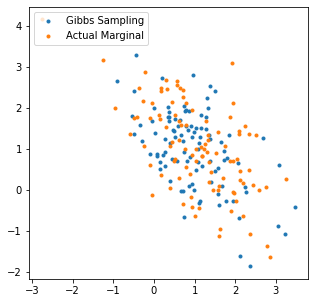

In [421]:
plt.figure(figsize = (5,5))
plt.plot(x,y,'.',label='Gibbs Sampling')
plt.plot(normal[:,0],normal[:,1],'.',label='Actual Marginal')
plt.legend(loc="upper left")

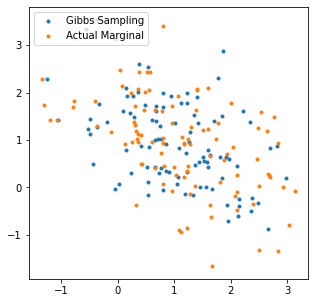

In [422]:
samples = gibbs_sampler(mus, sigmas)
x, y = zip(*samples)
normal = np.random.multivariate_normal([1, 1], [[1, -0.5], [-0.5, 1]],100)
plt.figure(figsize = (5,5))
plt.plot(x,y,'.',label='Gibbs Sampling')
plt.plot(normal[:,0],normal[:,1],'.',label='Actual Marginal')
plt.legend(loc="upper left")

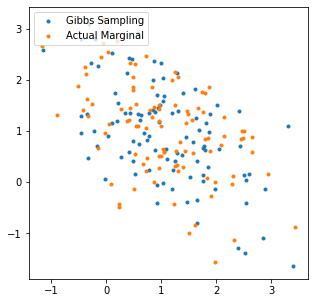

In [424]:
samples = gibbs_sampler(mus, sigmas)
x, y = zip(*samples)
normal = np.random.multivariate_normal([1, 1], [[1, -0.5], [-0.5, 1]],100)
plt.figure(figsize = (5,5))
plt.plot(x,y,'.',label='Gibbs Sampling')
plt.plot(normal[:,0],normal[:,1],'.',label='Actual Marginal')
plt.legend(loc="upper left")

Question 3

In [2]:
data = pd.read_csv("CHDdata.csv")

In [3]:
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


Data Cleaning

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

y_data = data["chd"]
x_data = data.drop("chd",axis=1)
var_num = x_data.drop("famhist",axis=1)
num_attribs = list(var_num)
cat_attribs = ["famhist"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat",OrdinalEncoder(), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(x_data)

In [5]:
num_attribs

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

In [6]:
train_prepared = pd.DataFrame(train_prepared,columns=['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age','famhist'])

In [7]:
#train_prepared['chd']=y_data do we need to include this?

In [7]:
train_prepared

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1.0
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,0.0
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,1.0
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1.0
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1.0
...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,0.0
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,0.0
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,0.0
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969,0.0


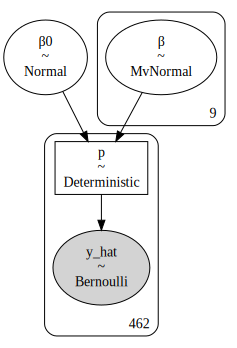

In [267]:
train_shape = train_prepared.shape[1]
with pm.Model() as full_model:
    β0 = pm.Normal('β0', mu=0, sigma=1)
    β = pm.MvNormal('β', mu=np.zeros(train_shape),cov=np.eye(train_shape),shape=train_shape)
    μ = β0 + pm.math.dot(train_prepared,β)
    p = pm.Deterministic('p', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=p, observed=y_data)
pm.model_to_graphviz(full_model)

In [86]:
with pm.Model() as full_model:
    β0 = pm.Normal('β0', mu=0, sigma=1)
    β = pm.MvNormal('β', mu=np.zeros(train_shape),cov=np.eye(train_shape),shape=train_shape)
    μ = β0 + pm.math.dot(train_prepared,β)
    p = pm.Deterministic('p', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=p, observed=y_data)
    binout = pm.sample(10000, cores=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [β0, β]


Sampling 8 chains for 1_000 tune and 10_000 draw iterations (8_000 + 80_000 draws total) took 164 seconds.


In [37]:
az.summary(binout.posterior, var_names = ['β0', 'β'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,-1.229,0.161,-1.528,-0.923,0.001,0.000,84156.0,65406.0,1.0
β[0],0.136,0.118,-0.088,0.356,0.000,0.000,112637.0,62913.0,1.0
β[1],0.372,0.123,0.141,0.604,0.000,0.000,123708.0,64263.0,1.0
β[2],0.366,0.123,0.132,0.597,0.000,0.000,127905.0,61673.0,1.0
β[3],0.146,0.220,-0.256,0.569,0.001,0.001,65807.0,61094.0,1.0
β[4],0.388,0.121,0.163,0.617,0.000,0.000,122609.0,62149.0,1.0
β[5],-0.265,0.181,-0.600,0.081,0.001,0.000,73864.0,66517.0,1.0
β[6],0.003,0.111,-0.207,0.208,0.000,0.000,113746.0,60978.0,1.0
β[7],0.657,0.174,0.328,0.984,0.001,0.000,83902.0,65205.0,1.0
β[8],0.870,0.223,0.447,1.285,0.001,0.001,85449.0,67145.0,1.0


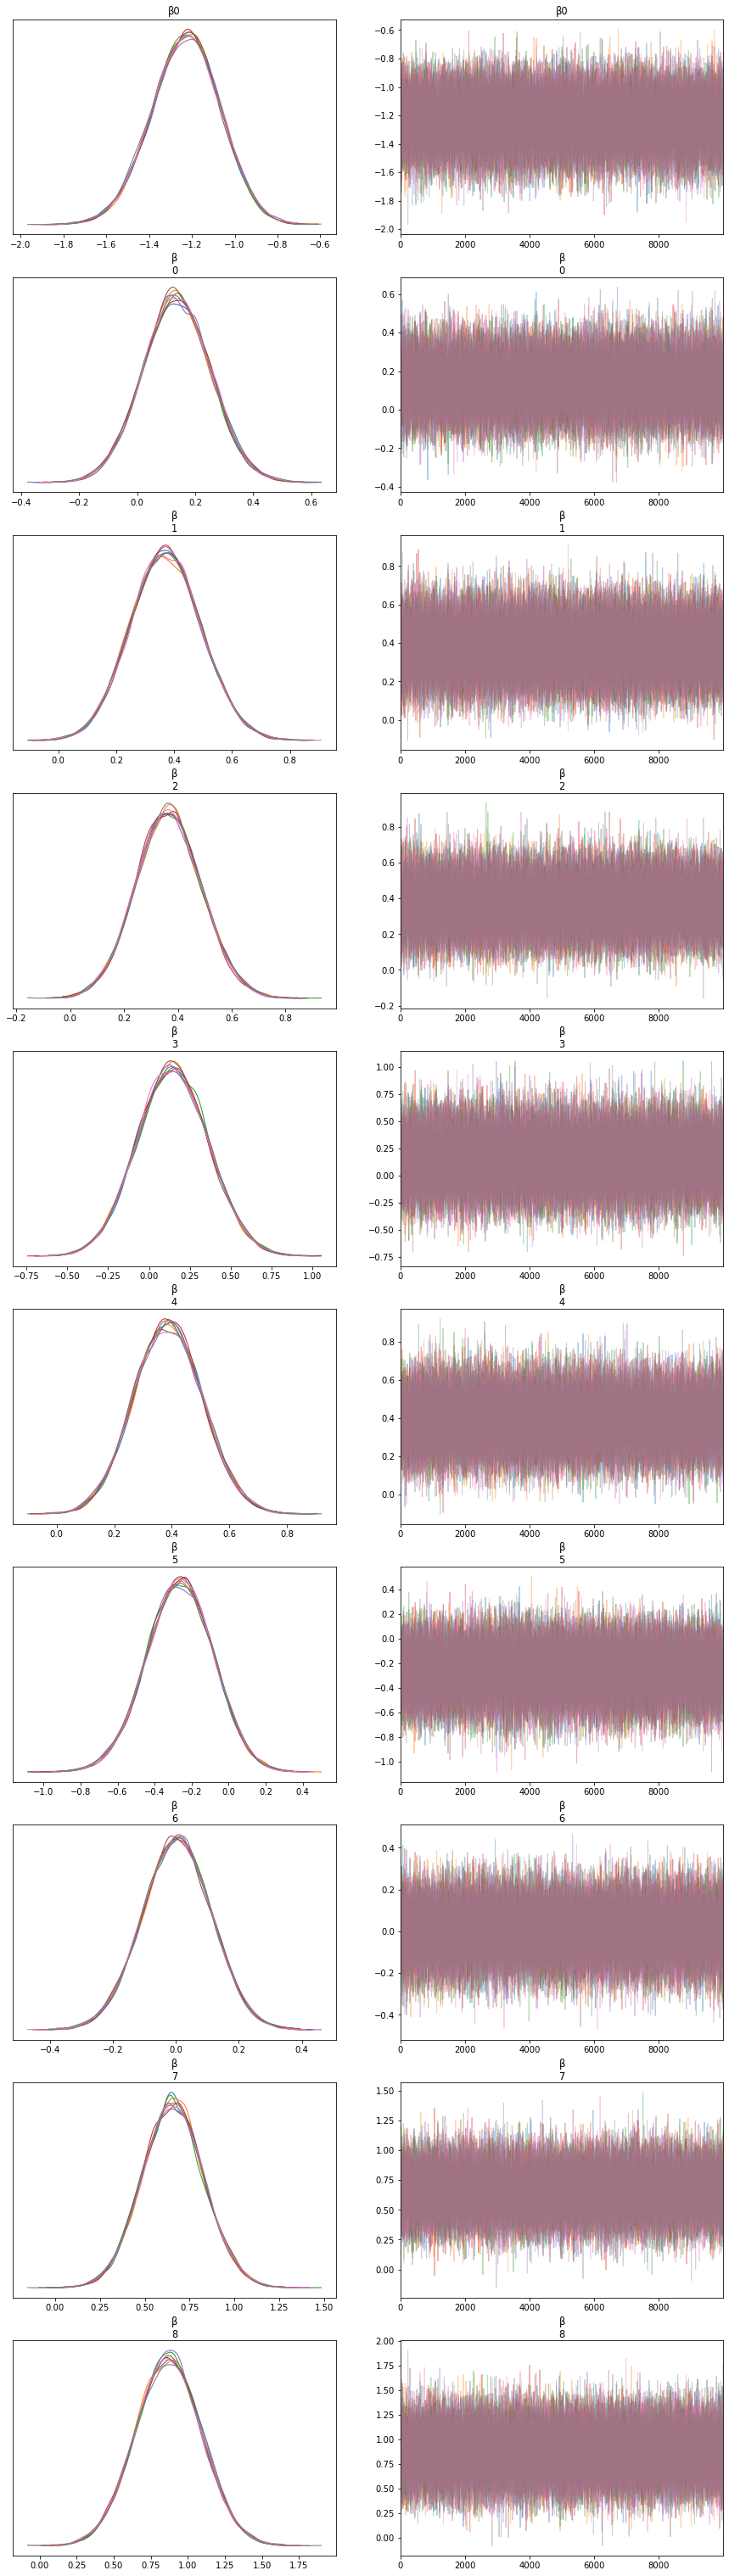

In [38]:
az.plot_trace(binout, compact = False, var_names = ['β0', 'β'], figsize = (15,55));

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

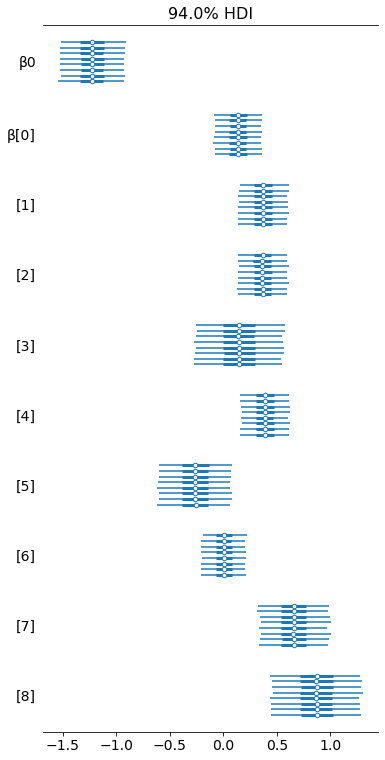

In [39]:
az.plot_forest(binout, var_names=['β0', 'β'])

Question 4

In [135]:
# Set ransom seed
np.random.seed(22904)

In [136]:
# Import radon data
srrs2 = pd.read_csv(pm.get_data('srrs2.dat'))
srrs2.columns = srrs2.columns.map(str.strip)
srrs_mn = srrs2[srrs2.state=='MN'].copy()

In [137]:
#county-level predictor - combining two variables

srrs_mn['fips'] = srrs_mn.stfips*1000 + srrs_mn.cntyfips
cty = pd.read_csv(pm.get_data('cty.dat'))
cty_mn = cty[cty.st=='MN'].copy()
cty_mn[ 'fips'] = 1000*cty_mn.stfips + cty_mn.ctfips

In [138]:
# Combine home- and county-level information in a single DataFrame

srrs_mn = srrs_mn.merge(cty_mn[['fips', 'Uppm']], on='fips')
srrs_mn = srrs_mn.drop_duplicates(subset='idnum')
u = np.log(srrs_mn.Uppm)

n = len(srrs_mn)

In [139]:
srrs_mn.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm
0,5081,MN,MN,27,55735,5,1,1,3,N,...,12288,2.2,9.7,1146.499190,1,0,1,AITKIN,27001,0.502054
1,5082,MN,MN,27,55748,5,1,0,4,Y,...,12088,2.2,14.5,471.366223,0,0,1,AITKIN,27001,0.502054
2,5083,MN,MN,27,55748,5,1,0,4,Y,...,21188,2.9,9.6,433.316718,0,0,1,AITKIN,27001,0.502054
3,5084,MN,MN,27,56469,5,1,0,4,Y,...,123187,1.0,24.3,461.623670,0,0,1,AITKIN,27001,0.502054
4,5085,MN,MN,27,55011,3,1,0,4,Y,...,13088,3.1,13.8,433.316718,0,0,3,ANOKA,27003,0.428565


In [140]:
# The variables

srrs_mn.columns

Index(['idnum', 'state', 'state2', 'stfips', 'zip', 'region', 'typebldg',
       'floor', 'room', 'basement', 'windoor', 'rep', 'stratum', 'wave',
       'starttm', 'stoptm', 'startdt', 'stopdt', 'activity', 'pcterr', 'adjwt',
       'dupflag', 'zipflag', 'cntyfips', 'county', 'fips', 'Uppm'],
      dtype='object')

In [141]:
# lookup table (dict) for each county

srrs_mn.county = srrs_mn.county.map(str.strip)
mn_counties = srrs_mn.county.unique()
counties = len(mn_counties)
county_lookup = dict(zip(mn_counties, range(len(mn_counties))))

In [142]:
# local copies of variables

county = srrs_mn['county_code'] = srrs_mn.county.replace(county_lookup).values
radon = srrs_mn.activity
srrs_mn['log_radon'] = log_radon = np.log(radon + 0.1).values
floor_measure = srrs_mn.floor.values

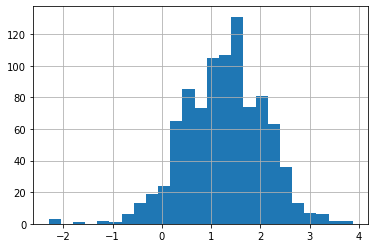

In [143]:
# Histogram of radon levels

srrs_mn.activity.apply(lambda x: np.log(x+0.1)).hist(bins=25);

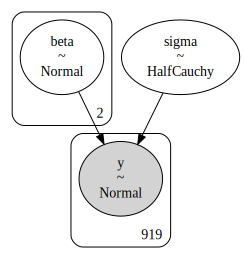

In [264]:
# Complete pooling model
# All counties are contributors to the data and then ignored to produce one statewide model
# This model uses only the intercept and the floor (this is binary to show basement or not)

floor = srrs_mn.floor.values
log_radon = srrs_mn.log_radon.values

with pm.Model() as pooled_model:
    #pm.Normal('α', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1e5, shape=2)
    sigma = pm.HalfCauchy('sigma', 5)

    theta = beta[0] + beta[1]*floor

    y = pm.Normal('y', theta, sigma=sigma, observed=log_radon)
pm.model_to_graphviz(pooled_model)

In [155]:
with pooled_model:
    pooled_trace = pm.sample(1000, cores = 4, tune=1000)
    #pooled_idata = az.from_pymc3(pooled_trace)
az.summary(pooled_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],1.36,0.03,1.31,1.41,0.0,0.0,3702.97,3060.64,1.0
beta[1],-0.59,0.07,-0.72,-0.46,0.0,0.0,3987.54,2720.08,1.0
sigma,0.79,0.02,0.76,0.83,0.0,0.0,5443.31,3183.01,1.0


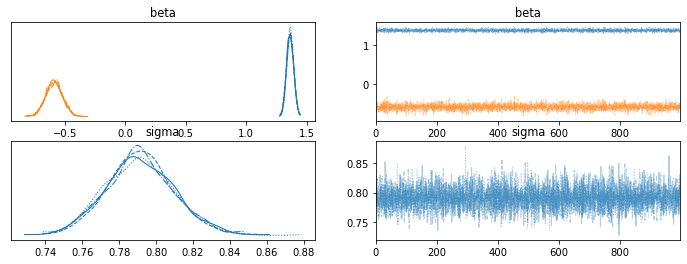

In [159]:
with pooled_model:
    pm.plot_trace(pooled_trace)

In [194]:
b0 = az.summary(pooled_trace, round_to=2)['mean']['beta[0]']

In [195]:
m0 = az.summary(pooled_trace, round_to=2)['mean']['beta[1]']

Text(0, 0.5, 'Log(Radon)')

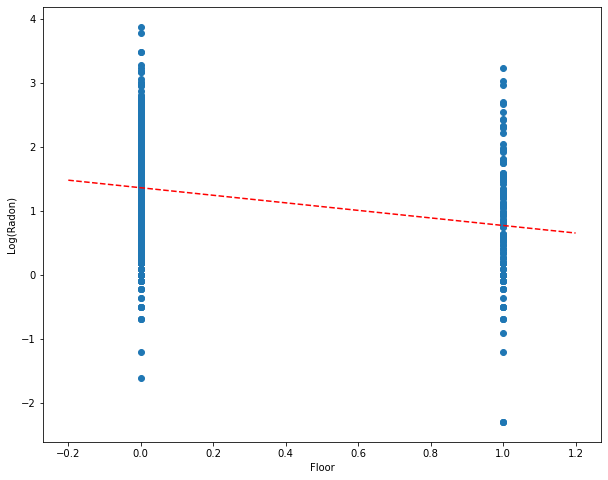

In [196]:
# Plot of the pooled model

plt.figure(figsize = (10,8))
plt.scatter(srrs_mn.floor, np.log(srrs_mn.activity+0.1))
xvals = np.linspace(-0.2, 1.2)
plt.plot(xvals, m0*xvals+b0, 'r--');
plt.xlabel("Floor")
plt.ylabel("Log(Radon)")

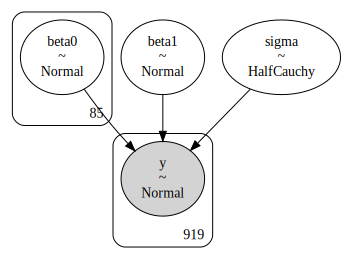

In [265]:
# Unpooled Model

with pm.Model() as unpooled_model:

    beta0 = pm.Normal('beta0', 0, sigma=1e5, shape=counties)
    beta1 = pm.Normal('beta1', 0, sigma=1e5)
    sigma = pm.HalfCauchy('sigma', 5)

    theta = beta0[county] + beta1*floor

    y = pm.Normal('y', theta, sigma=sigma, observed=log_radon)
pm.model_to_graphviz(unpooled_model)

In [172]:
#do i have to do anything to convert this?
with unpooled_model:
    unpooled_trace = pm.sample(1000, cores = 4, tune=1000)
    #unpooled_idata = az.from_pymc3(unpooled_trace)
az.summary(unpooled_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0[0],0.89,0.37,0.22,1.63,0.00,0.0,7053.23,2607.83,1.0
beta0[1],0.93,0.10,0.75,1.12,0.00,0.0,7256.63,2861.32,1.0
beta0[2],1.55,0.43,0.76,2.37,0.01,0.0,6977.88,2854.91,1.0
beta0[3],1.59,0.28,1.05,2.10,0.00,0.0,6703.64,2637.91,1.0
beta0[4],1.46,0.37,0.78,2.14,0.00,0.0,6860.24,3032.93,1.0
...,...,...,...,...,...,...,...,...,...
beta0[82],1.66,0.21,1.27,2.05,0.00,0.0,7738.69,2638.27,1.0
beta0[83],1.67,0.21,1.29,2.05,0.00,0.0,5724.36,2550.61,1.0
beta0[84],1.21,0.50,0.29,2.16,0.01,0.0,6913.28,2801.93,1.0
beta1,-0.69,0.07,-0.82,-0.56,0.00,0.0,3606.93,2606.26,1.0


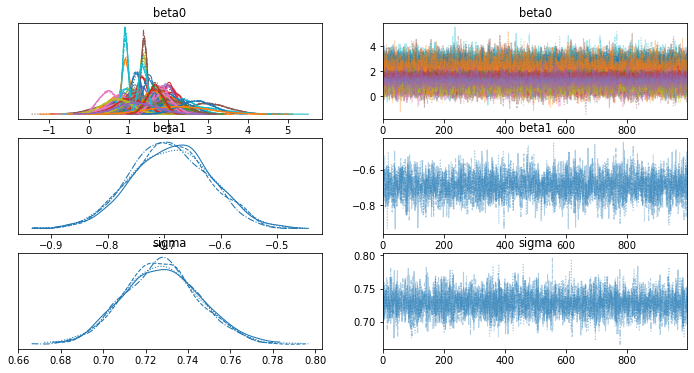

In [173]:
with unpooled_model:
    pm.plot_trace(unpooled_trace)

<Figure size 432x1008 with 0 Axes>

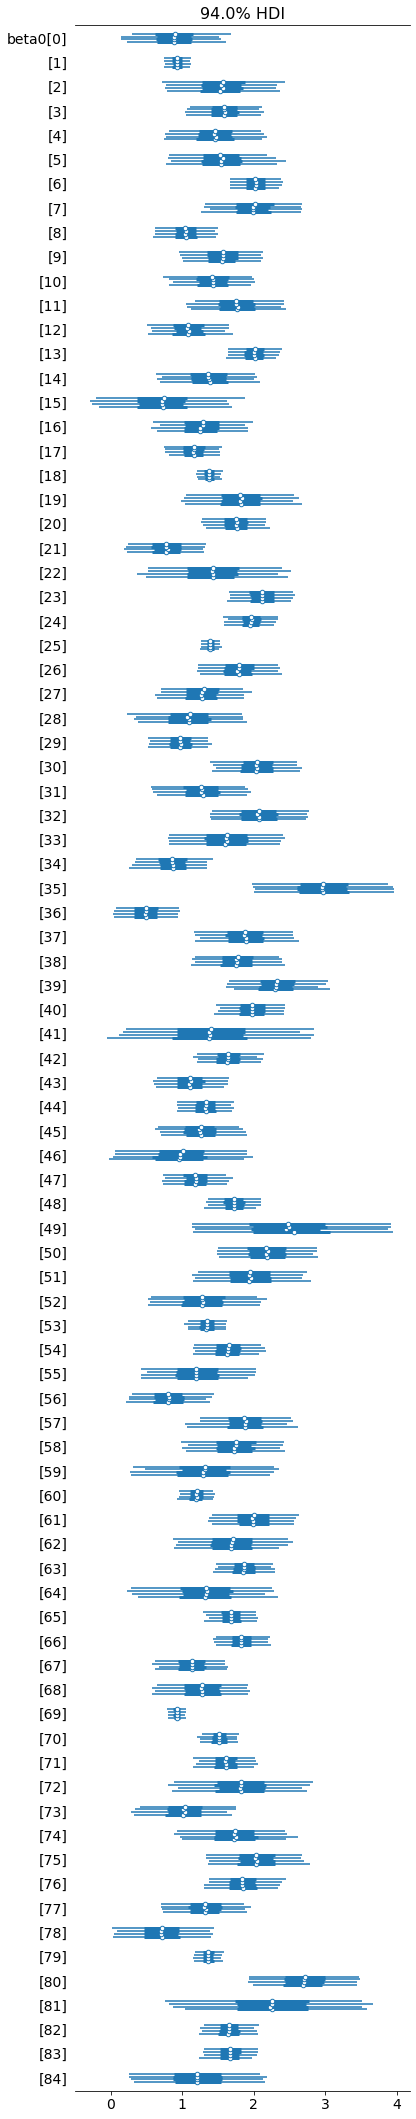

In [176]:
# County parameters
plt.figure(figsize=(6,14))
pm.plot_forest(unpooled_trace, var_names=['beta0']);

In [237]:
# Unpooled estimates

unpooled_estimates = pd.Series(az.summary(unpooled_trace)['mean'][0:85].values, index=mn_counties)
unpooled_se = pd.Series(az.summary(unpooled_trace)['sd'][0:85].values, index=mn_counties)

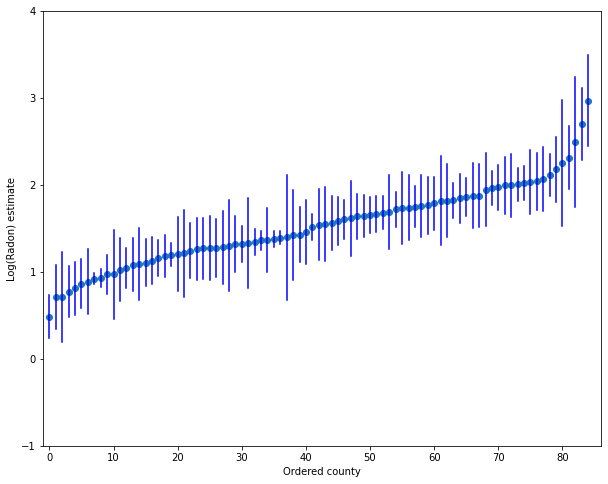

In [238]:
# Plot of the unpooled estimates

order = unpooled_estimates.sort_values().index

plt.figure(figsize = (10,8))
plt.scatter(range(len(unpooled_estimates)), unpooled_estimates[order])
for i, m, se in zip(range(len(unpooled_estimates)), unpooled_estimates[order], unpooled_se[order]):
    plt.plot([i,i], [m-se, m+se], 'b-')
plt.xlim(-1,86); plt.ylim(-1,4)
plt.ylabel('Log(Radon) estimate');plt.xlabel('Ordered county');

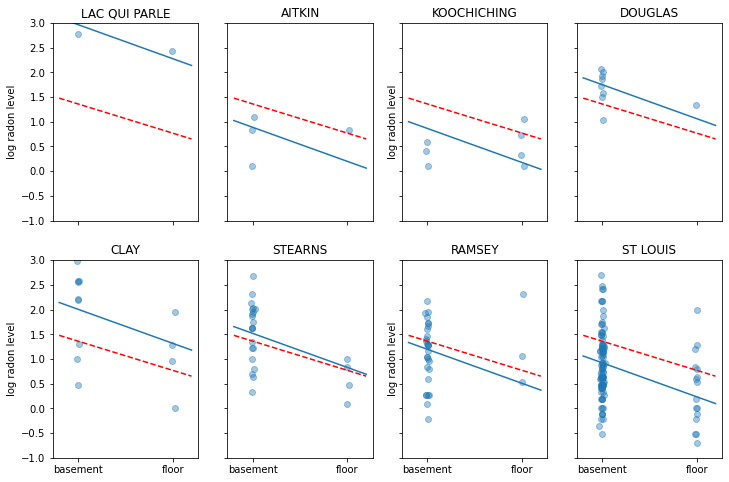

In [239]:
# Plot of pooled and unpooled estimates for some counties

sample_counties = ('LAC QUI PARLE', 'AITKIN', 'KOOCHICHING',
                    'DOUGLAS', 'CLAY', 'STEARNS', 'RAMSEY', 'ST LOUIS')

fig, axes = plt.subplots(2, 4, figsize=(12, 8), sharey=True, sharex=True)
axes = axes.ravel()
#m = unpooled_trace['beta1'].mean()
m = az.summary(unpooled_trace)['mean']['beta1']
for i,c in enumerate(sample_counties):
    y = srrs_mn.log_radon[srrs_mn.county==c]
    x = srrs_mn.floor[srrs_mn.county==c]
    axes[i].scatter(x + np.random.randn(len(x))*0.01, y, alpha=0.4)

    # No pooling model
    b = unpooled_estimates[c]

    # Plot both models and data
    xvals = np.linspace(-0.2, 1.2)
    axes[i].plot(xvals, m*xvals+b)
    axes[i].plot(xvals, m0*xvals+b0, 'r--')
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['basement', 'floor'])
    axes[i].set_ylim(-1, 3)
    axes[i].set_title(c)
    if not i%2:
        axes[i].set_ylabel('log radon level')

Partial Pooling Model

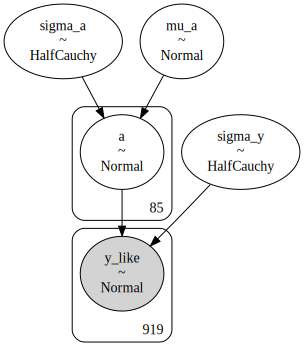

In [266]:
with pm.Model() as partial_pooling:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sigma=1e5)
    sigma_a = pm.HalfCauchy('sigma_a', 5)

    # Random intercepts
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=counties)

    # Model error
    sigma_y = pm.HalfCauchy('sigma_y',5)

    # Expected value
    y_hat = a[county]

    # Data likelihood
    y_like = pm.Normal('y_like', mu=y_hat, sigma=sigma_y, observed=log_radon)

pm.model_to_graphviz(partial_pooling)

In [243]:
with partial_pooling:
    partial_pooling_trace = pm.sample(2000, cores = 4, tune=1000)
    #partial_pooled_idata = az.from_pymc3(partial_pooling_trace)
az.summary(partial_pooling_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_a, sigma_a, a, sigma_y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 41 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_a,1.35,0.05,1.26,1.44,0.0,0.0,4127.39,5113.08,1.0
a[0],1.10,0.24,0.65,1.58,0.0,0.0,8633.89,5401.68,1.0
a[1],0.94,0.10,0.76,1.13,0.0,0.0,7823.09,6037.52,1.0
a[2],1.26,0.26,0.76,1.73,0.0,0.0,8039.22,4992.06,1.0
a[3],1.27,0.21,0.86,1.66,0.0,0.0,7698.26,5715.67,1.0
...,...,...,...,...,...,...,...,...,...
a[82],1.45,0.17,1.13,1.79,0.0,0.0,8596.23,5165.47,1.0
a[83],1.52,0.17,1.19,1.84,0.0,0.0,8433.80,5732.26,1.0
a[84],1.31,0.27,0.80,1.82,0.0,0.0,10208.28,5771.09,1.0
sigma_a,0.30,0.05,0.21,0.39,0.0,0.0,1507.01,1804.24,1.0


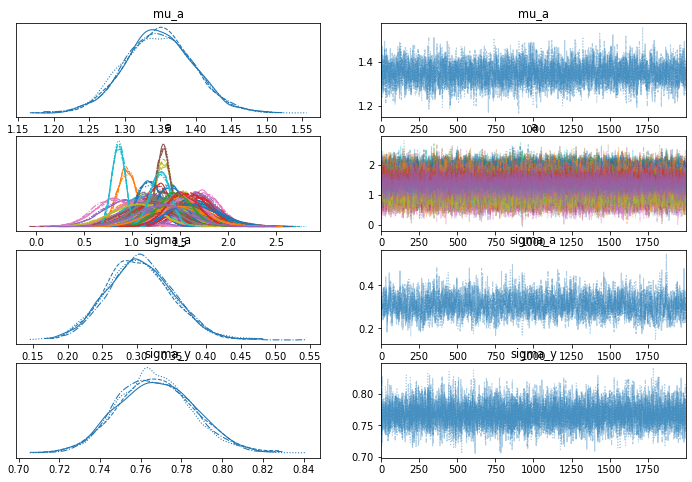

In [244]:
with partial_pooling:
    pm.plot_trace(partial_pooling_trace)

<Figure size 432x1296 with 0 Axes>

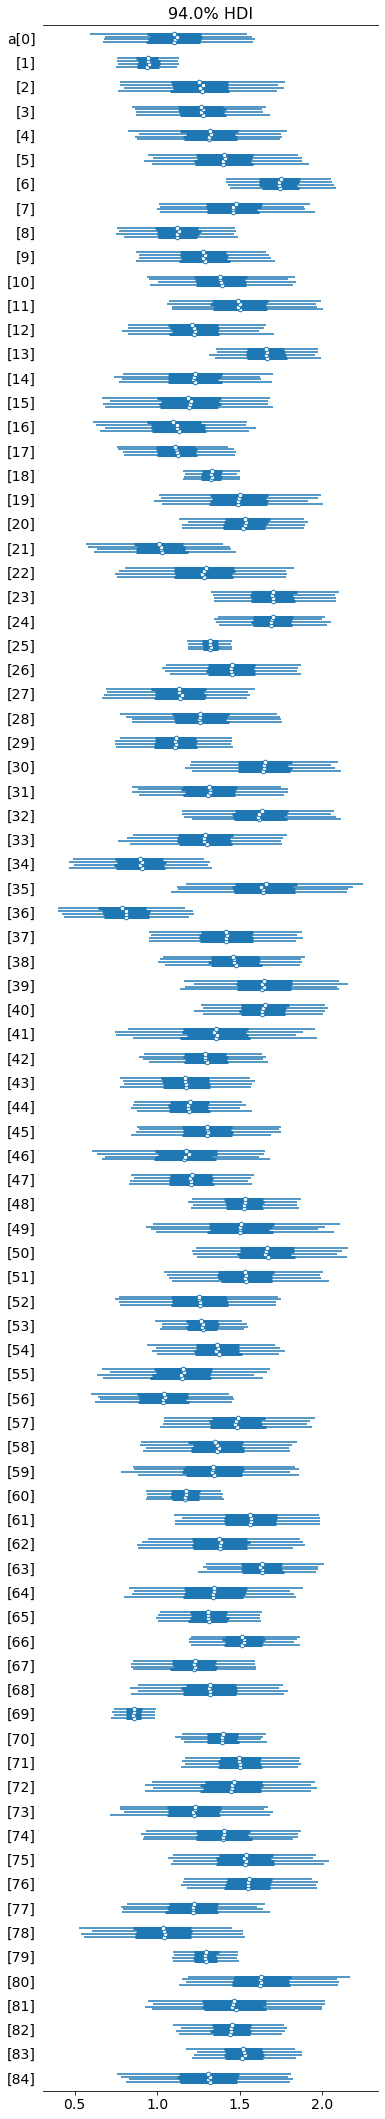

In [245]:
# parameter plots

with partial_pooling:
    plt.figure(figsize=(6,18))
    pm.plot_forest(partial_pooling_trace, var_names=['a']);

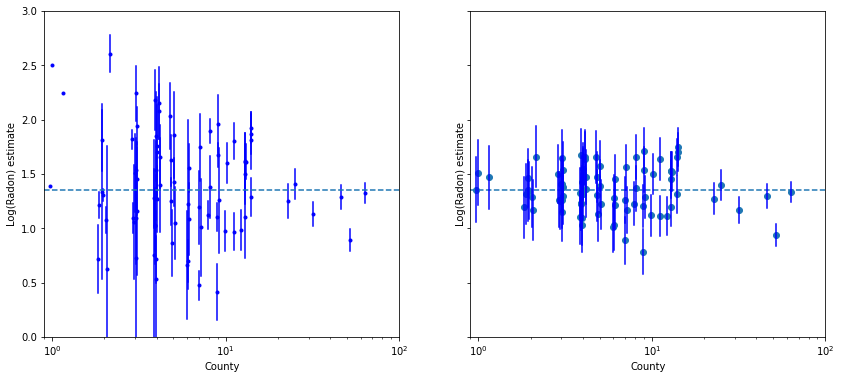

In [358]:
#is this how to do this??? ask how to access the 'a' value
sample_trace = partial_pooling_trace.posterior['a'][3] #.mean(axis=0)
# partial_pooling_trace.posterior['a'][3]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
samples, counties = sample_trace.shape
jitter = np.random.normal(scale=0.1, size=counties)

n_county = srrs_mn.groupby('county')['idnum'].count()
unpooled_means = srrs_mn.groupby('county')['log_radon'].mean()
unpooled_sd = srrs_mn.groupby('county')['log_radon'].std()
unpooled = pd.DataFrame({'n':n_county, 'm':unpooled_means, 'sd':unpooled_sd})
unpooled['se'] = unpooled.sd/np.sqrt(unpooled.n)

axes[0].plot(unpooled.n + jitter, unpooled.m, 'b.')
for j, row in zip(jitter, unpooled.iterrows()):
    name, dat = row
    axes[0].plot([dat.n+j,dat.n+j], [dat.m-dat.se, dat.m+dat.se], 'b-')
axes[0].set_xscale('log')
axes[0].hlines(sample_trace.mean(), 0.9, 100, linestyles='--')
axes[0].set_ylabel("Log(Radon) estimate")
axes[0].set_xlabel("County")


samples, counties = sample_trace.shape
means = sample_trace.mean(axis=0)
sd = sample_trace.std(axis=0)
axes[1].scatter(n_county.values + jitter, means)
axes[1].set_xscale('log')
axes[1].set_xlim(0.9,100)
axes[1].set_ylim(0, 3)
axes[1].hlines(sample_trace.mean(), 0.9, 100, linestyles='--')
axes[1].set_ylabel("Log(Radon) estimate")
axes[1].set_xlabel("County")

for j,n,m,s in zip(jitter, n_county.values, means, sd):
    axes[1].plot([n+j]*2, [m-s, m+s], 'b-')

In [355]:
partial_pooling_trace.posterior['a'].shape

(4, 2000, 85)

# Hierarchical Model
## Varying intercept and slope model

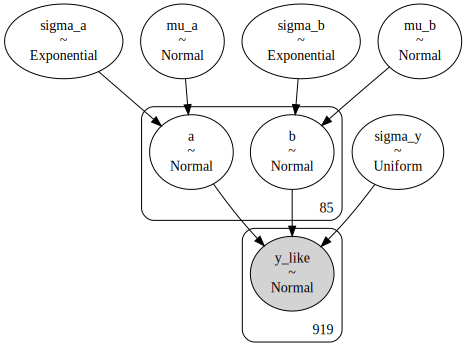

In [263]:
with pm.Model() as varying_intercept_slope:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sigma=1e5)
    sigma_a = pm.Exponential("sigma_a", 0.5)
    mu_b = pm.Normal('mu_b', mu=0., sigma=1e5)
    #sigma_b =  pm.HalfCauchy('sigma_b', 10)
    sigma_b = pm.Exponential("sigma_b", .5)

    # Random intercepts
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=counties)
    # Random slopes
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=counties)

    # Model error
    sigma_y = pm.Uniform('sigma_y', lower=0, upper=100)

    # Expected value
    y_hat = a[county] + b[county] * floor_measure

    # Data likelihood
    y_like = pm.Normal('y_like', mu=y_hat, sigma=sigma_y, observed=log_radon)

pm.model_to_graphviz(varying_intercept_slope)

In [258]:
with varying_intercept_slope:
    varying_intercept_slope_trace = pm.sample(5000, step = pm.NUTS(target_accept = 0.99), cores = 4, tune=5000)
    #varying_intercept_slope_idata = az.from_pymc3(varying_intercept_slope_trace)
az.summary(varying_intercept_slope_trace, round_to=2)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_a, sigma_a, mu_b, sigma_b, a, b, sigma_y]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 572 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 156 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8812, but should be close to 0.99. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_a,1.49,0.05,1.40,1.59,0.00,0.00,6355.45,11358.03,1.00
mu_b,-0.65,0.08,-0.80,-0.50,0.00,0.00,2853.75,5300.05,1.00
a[0],1.22,0.25,0.75,1.68,0.00,0.00,20607.66,13679.70,1.00
a[1],0.99,0.10,0.81,1.17,0.00,0.00,26165.27,13983.53,1.00
a[2],1.50,0.26,1.00,1.99,0.00,0.00,13866.51,13973.30,1.00
...,...,...,...,...,...,...,...,...,...
b[83],-0.66,0.26,-1.16,-0.15,0.00,0.00,15366.16,5590.22,1.02
b[84],-0.65,0.30,-1.25,-0.07,0.00,0.00,14824.17,5215.09,1.02
sigma_a,0.32,0.05,0.24,0.41,0.00,0.00,5682.97,9592.31,1.00
sigma_b,0.25,0.13,0.02,0.46,0.02,0.01,39.67,73.68,1.09


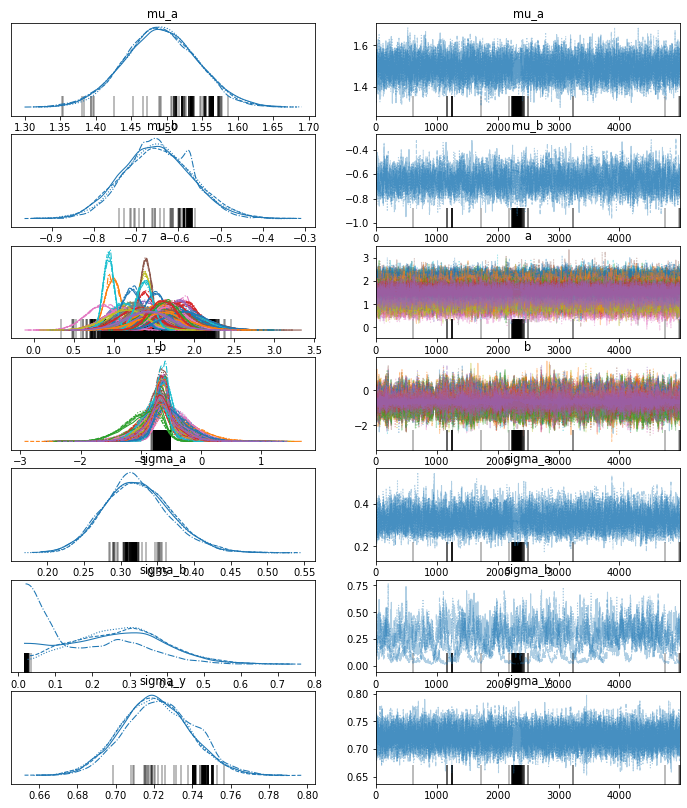

In [259]:
with varying_intercept_slope:
    pm.plot_trace(varying_intercept_slope_trace)

<Figure size 432x1296 with 0 Axes>

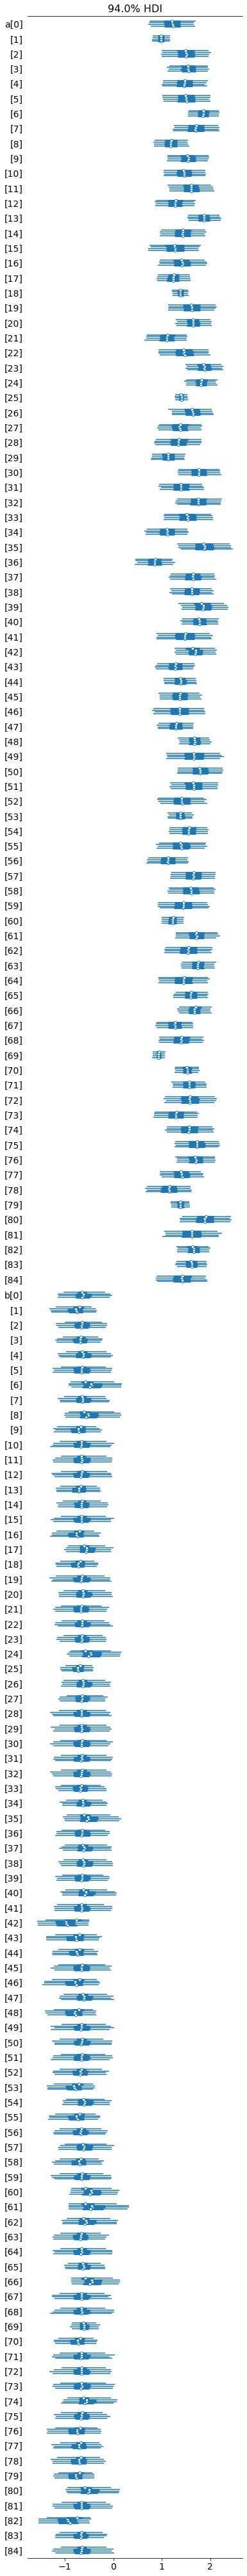

In [260]:
# parameter plots

with varying_intercept_slope:
    plt.figure(figsize=(6,18))
    pm.plot_forest(varying_intercept_slope_trace, var_names=['a','b']);

In [261]:
az.summary(varying_intercept_slope_trace)['mean']['a[0]':'a[84]'].values

array([1.215, 0.986, 1.499, 1.544, 1.467, 1.505, 1.855, 1.702, 1.183,
       1.541, 1.46 , 1.606, 1.275, 1.872, 1.43 , 1.267, 1.418, 1.234,
       1.385, 1.615, 1.65 , 1.104, 1.462, 1.878, 1.813, 1.402, 1.633,
       1.372, 1.345, 1.135, 1.763, 1.395, 1.753, 1.531, 1.107, 1.882,
       0.85 , 1.641, 1.619, 1.851, 1.778, 1.475, 1.681, 1.278, 1.386,
       1.372, 1.36 , 1.287, 1.674, 1.668, 1.794, 1.658, 1.415, 1.383,
       1.556, 1.398, 1.124, 1.654, 1.604, 1.44 , 1.22 , 1.714, 1.547,
       1.745, 1.446, 1.597, 1.675, 1.268, 1.399, 0.936, 1.52 , 1.564,
       1.582, 1.288, 1.566, 1.722, 1.698, 1.41 , 1.144, 1.383, 1.893,
       1.618, 1.649, 1.614, 1.412])

Text(0, 0.5, 'Log(Radon)')

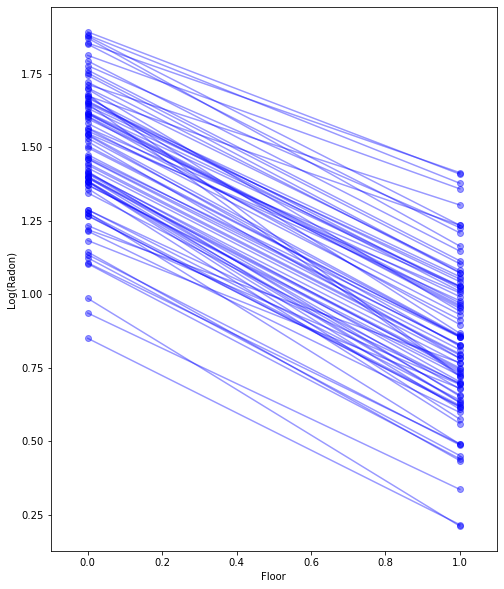

In [262]:
# County predictions

xvals = np.arange(2)
#b = varying_intercept_slope_trace['a'].mean(axis=0)
b = az.summary(varying_intercept_slope_trace)['mean']['a[0]':'a[84]'].values
#m = varying_intercept_slope_trace['b'].mean(axis=0)
m = az.summary(varying_intercept_slope_trace)['mean']['b[0]':'b[84]'].values
plt.figure(figsize = (8,10))
for bi,mi in zip(b,m):
    plt.plot(xvals, mi*xvals + bi, 'bo-', alpha=0.4)
plt.xlim(-0.1, 1.1)
plt.xlabel("Floor")
plt.ylabel("Log(Radon)")

Question 5

In [33]:
simple_X = train_prepared[["ldl","typea","age"]]
simple_shape = simple_X.shape[1]
simple_X

,ldl,typea,age
0,0.478412,-0.418470,0.629336
1,-0.159680,0.193344,1.383115
2,-0.609245,-0.112563,0.218184
3,0.807126,-0.214532,1.040488
4,-0.599577,0.703189,0.423760
...,...,...,...
457,0.599263,1.111065,1.040488
458,-0.159680,-0.112563,0.629336
459,-1.522877,-1.336191,0.834912
460,3.320823,1.111065,-0.192969


In [27]:
with pm.Model() as simple_model:
    β0 = pm.Normal('β0', mu=0, sigma=1)
    β = pm.MvNormal('β', mu=np.zeros(simple_shape),cov=np.eye(simple_shape),shape=simple_shape)
    μ = β0 + pm.math.dot(simple_X,β)
    p = pm.Deterministic('p', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=p, observed=y_data)
    simple = pm.sample(10000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β0, β]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 73 seconds.


In [44]:
az.summary(simple.posterior, var_names = ['β0', 'β'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,-0.827,0.117,-1.051,-0.612,0.001,0.000,36773.0,31774.0,1.0
β[0],0.378,0.111,0.170,0.588,0.000,0.000,50848.0,31856.0,1.0
β[1],0.370,0.114,0.159,0.586,0.001,0.000,45245.0,33133.0,1.0
β[2],0.936,0.135,0.679,1.187,0.001,0.001,35345.0,32270.0,1.0


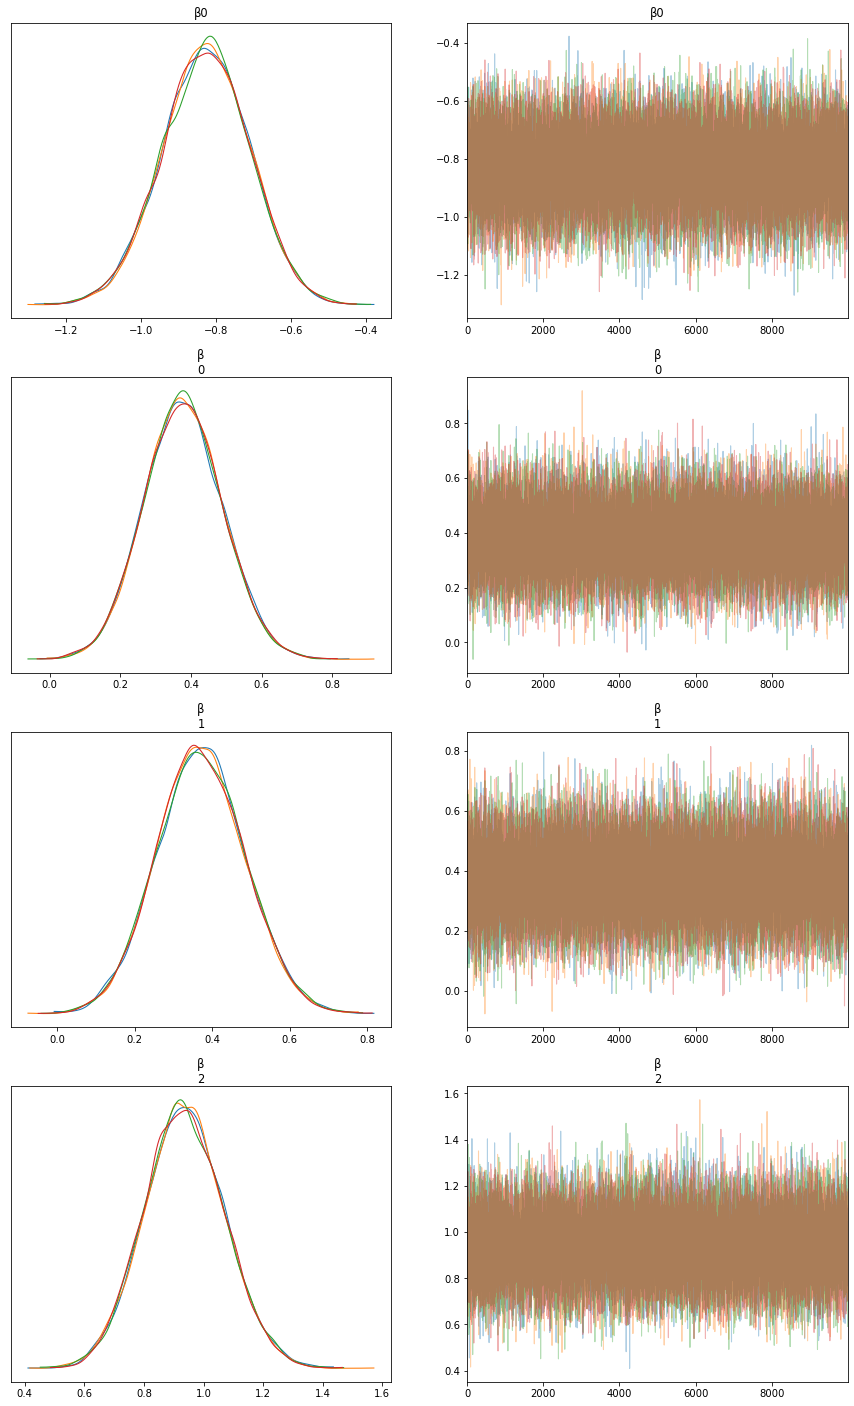

In [46]:
az.plot_trace(simple, compact = False, var_names = ['β0', 'β'], figsize = (15,25));

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

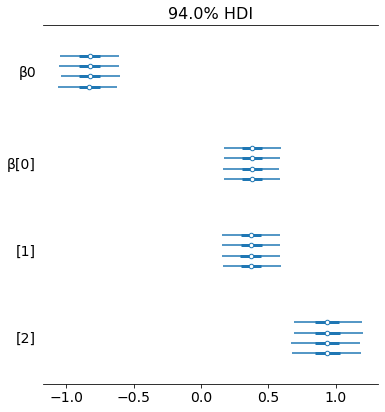

In [47]:
az.plot_forest(simple, var_names=['β0', 'β'])

In [88]:
#WAIC
cmp_waic = az.compare({'full_model':binout, 'simple_model':simple}, ic='waic', scale='deviance')
cmp_waic

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
full_model,0,492.487402,10.052357,0.000000,0.815153,21.650598,0.000000,False,deviance
simple_model,1,509.318298,4.029402,16.830896,0.184847,19.478463,10.386959,False,deviance


In [89]:
#LOO
cmp_loo = az.compare({'full_model':binout, 'simple_model':simple}, ic='loo',scale='deviance')
cmp_loo

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
full_model,0,492.522865,10.070089,0.000000,0.814603,21.652133,0.000000,False,deviance
simple_model,1,509.322046,4.031276,16.799182,0.185397,19.478745,10.387086,False,deviance


Both WAIC and LOO show that the model with all the features is better than the model with a reduced number of features. Therefore, I would pick the same model with both LOO and WAIC.

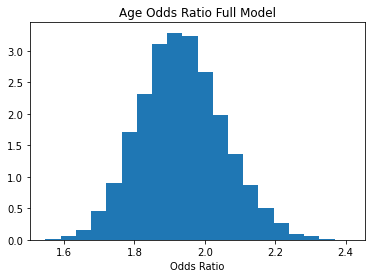

In [72]:
b =  binout.posterior["β"][:,:,7]
OR = np.mean(b, axis =0)
plt.hist(np.exp(OR), bins=20, density=True)
plt.xlabel("Odds Ratio")
plt.title("Age Odds Ratio Full Model")
plt.show()

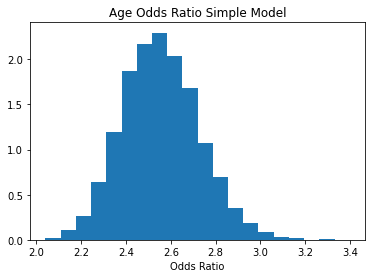

In [71]:
b =  simple.posterior["β"][:,:,2]
OR = np.mean(b, axis =0)
plt.hist(np.exp(OR), bins=20, density=True)
plt.xlabel("Odds Ratio")
plt.title("Age Odds Ratio Simple Model")
plt.show()

In [297]:
w = cmp_waic.loc['full_model','weight']
#w = .5
weights = [w, 1-w]


In [319]:
train_prepared.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'famhist'],
      dtype='object')

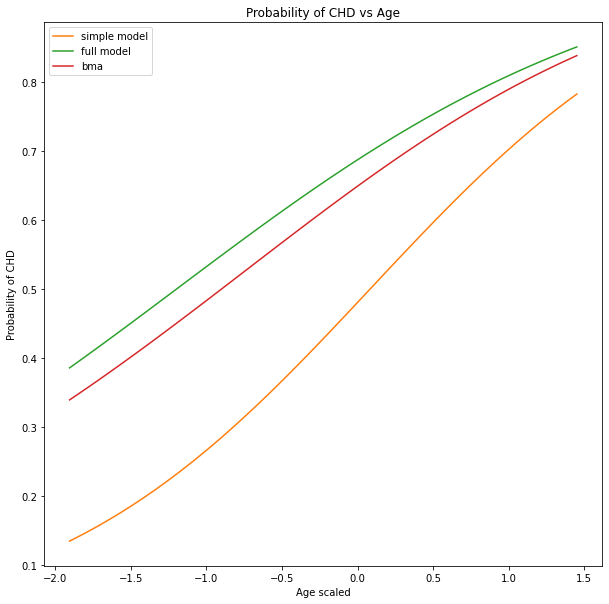

In [427]:
#x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
x_new = np.linspace(train_prepared['age'].min(), train_prepared['age'].max(), 100)
β0_l_post = simple.posterior['β0'].mean().item()
β00_l_post = simple.posterior['β'][:,:,0].mean().item()
β01_l_post = simple.posterior['β'][:,:,1].mean().item()
β02_l_post = simple.posterior['β'][:,:,2].mean().item()
y_l_post = (1 / (1 + np.exp(-(β0_l_post+
                              β00_l_post+
                              β01_l_post+
                              β02_l_post*x_new
                             ))))
plt.figure(figsize = (10,10))
plt.plot(x_new, y_l_post, 'C1', label='simple model')
β0_p_post = binout.posterior['β0'].mean().item()
β00_p_post = binout.posterior['β'][:,:,0].mean().item()
β01_p_post = binout.posterior['β'][:,:,1].mean().item()
β02_p_post = binout.posterior['β'][:,:,2].mean().item()
β03_p_post = binout.posterior['β'][:,:,3].mean().item()
β04_p_post = binout.posterior['β'][:,:,4].mean().item()
β05_p_post = binout.posterior['β'][:,:,5].mean().item()
β06_p_post = binout.posterior['β'][:,:,6].mean().item()
β07_p_post = binout.posterior['β'][:,:,7].mean().item()
β08_p_post = binout.posterior['β'][:,:,8].mean().item()
y_p_post = (1 / (1 + np.exp(-(β0_p_post+
                              β00_p_post+
                              β01_p_post+
                              β02_p_post+
                              β03_p_post+
                              β04_p_post+
                              β05_p_post+
                              β06_p_post+
                              (β07_p_post*x_new)+
                              β08_p_post
                             ))))
plt.plot(x_new, y_p_post, 'C2', label='full model')
y_bma_post = (1-w)*y_l_post+w*y_p_post
plt.plot(x_new, y_bma_post, 'C3', label='bma')
#plt.scatter(train_prepared['age'], y_data, c='C0', marker='.')
plt.xlabel('Age scaled')
plt.ylabel('Probability of CHD')
plt.title('Probability of CHD vs Age')
plt.legend()